# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies
import csv
import json
import requests
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from config import api_key 
from citipy import citipy

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build query URL
query_url = url + "APPID=" + api_key + "&units=" + units +"&q="
#query_url = f"{url}APPID={api_key}&units={units}&q="

# Pretty print JSON for all launchpads
#response = requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

#print(api_key)
#query_url = f"{url}appid={api_key}&q={cityid}&units={units}"
#query_url = f"{url}appid={api_key}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?APPID=38be8af88b04a8ca04e4d9026999e558&units=imperial&q=


In [ ]:
# Output File (CSV)
#output_data_file = "output/cities.csv"


In [ ]:
# Store filepath in a variable
#city_weather = "Resources/cityweather.csv"


# Export file as a CSV, without the Pandas index, but with the header
#output_data_file.to_csv("Output/cities.csv", index=False, header=True)

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Place all of the data found into a summary DataFrame
# set up lists to hold reponse info
town = []
lat = []
temp = []
speed = []
humid = []
cloud = []
lon = []
terr = []
date = []
most = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        town.append(response["name"])
        terr.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp"])
        most.append(response["main"]["temp_max"])            
        speed.append(response["wind"]["speed"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        lon.append(response["coord"]["lon"])
    except:
        #print("Skip invalid data")
        continue
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
# print(f"The wind speed information received is: {speed}")
# print(f"The humidity information received is: {humid}")
# print(f"The clouds information received is: {cloud}")
# print(f"The longitude information received is: {lon}")



In [ ]:
# Pretty print JSON for all launchpads
#response = requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": town,
    "Cloud Cover": cloud,
    "Country": terr,
    "Date": date,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": most,
    "Temperature": temp,
    "Wind Speed": speed    
    }
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloud Cover,Country,Date,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed
0,Sawankhalok,40,TH,1561524886,74,17.31,99.83,97.00,92.28,5.82
1,Atuona,0,PF,1561524547,77,-9.80,-139.03,80.87,80.87,19.01
2,Punta Arenas,90,CL,1561524548,96,-53.16,-70.91,32.00,32.00,3.36
3,Sibolga,48,ID,1561524665,71,1.74,98.78,82.85,82.85,2.77
4,Shitanjing,100,CN,1561524886,81,39.23,106.34,60.01,60.01,5.99
5,Ushuaia,75,AR,1561524510,92,-54.81,-68.31,30.20,30.20,5.82
6,Hobart,0,AU,1561524337,50,-42.88,147.33,57.20,56.23,8.05
7,Busselton,46,AU,1561524886,82,-33.64,115.35,63.00,63.00,21.00
8,Bathsheba,20,BB,1561524886,74,13.22,-59.52,80.60,80.60,19.46
9,Hilo,40,US,1561524886,58,19.71,-155.08,82.40,76.06,12.75


In [8]:
# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv("output/weatherdata.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Store the savaed csv file in a variable and use this to create the graphs
weatherfile = "output/weatherdata.csv"

In [11]:
# Read our Data file with the pandas library
weather_df = pd.read_csv(weatherfile)
#print(weather_df)

#### Latitude vs. Temperature Plot

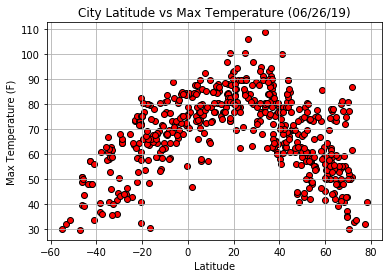

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o",facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (06/26/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

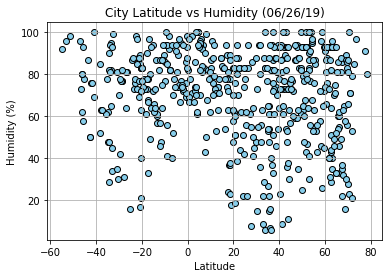

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o",facecolors="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (06/26/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/Latitude_vs_Humidity_Plot.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

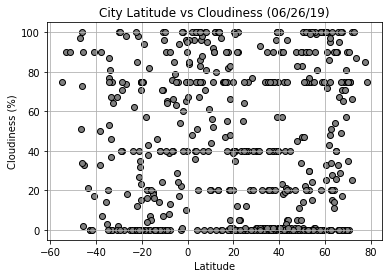

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloud Cover"], marker="o",facecolors="gray", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (06/26/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/Latitude_vs_Cloudiness_Plot.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

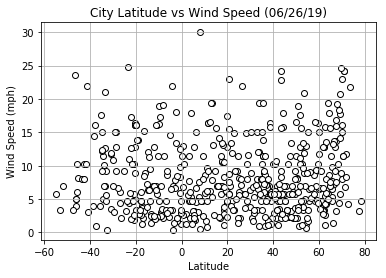

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o",facecolors="white", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (06/26/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/Latitude_vs_Windspeed_Plot.png")

# Show plot
plt.show()

